<a href="https://colab.research.google.com/github/jefersonmglh/Formula-1_data_analyses/blob/main/all_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Author** : Jeferson Magalhães dos Santos

* **[e-mail](mailto:jefersonmdossantos@gmail.com)**
* **[github](https://github.com/jefersonmglh)**

#  <a name="indice">  Index </a>

* [Summary](#resumo)
* [1. Packages imports](#1)
* [2. Data loading](#2)
  * [2.1 Preliminary analysis](#2.1)
  * [2.2 Features engineering](#2.2)
  * [2.3 Features description](#2.3)
* [3. Exploratory Analysis](#3)
  * [3.1 UniVar](#3.1)
  * [3.2 BiVar](#3.2)
* [4. Conclusion](#4)
* [5. References](#5)

#  <a name="resumo"> Summary </a>
[Back to index](#indice)

This notebook explores all the Formula 1 data from 1950 (the inaugural season) from 2018. 
The main objectives investing this data are:
* Improvement of data engineering, analyses and plotting skills
* How the Formula 1 changed over the years?
* What are the most drivers/constructors successfull throughout the history of Formula 1?
* How race speed changed over the years?


#  <a name="1">1. Packages imports </a>
[Back to index](#indice)

In [202]:
#basic
import pandas as pd
import numpy as np
np.random.seed(0)

#graph
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette('Set2')
import missingno as msno

#function to add labels on graphs
def addlabels(x,y, ha='center'):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = ha)

#colab
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/Colab Notebooks/f1_project/datasets'

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#  <a name="2">2. Data loading</a>
[Back to index](#indice)


* reading all csv files
* merging it in one dataframe
* basic cleaning and renaming some features
* rearrange

In [203]:
#reading csv files
df_results = pd.read_csv(f'{PATH}/results.csv', names = ['result_id', 'race_id', 'driver_id', 'constructor_id', 'number', 'grid', 'position','position_text','position_order', 'points', 'laps','time','milliseconds','fastest_lap','rank','fastest_lap_time','fastest_lap_speed','status_id'], header=None)
df_races = pd.read_csv(f'{PATH}/races.csv', names = ['race_id', 'year', 'round','circuit_id', 'name','date','time','url'],header=None)
df_drivers = pd.read_csv(f'{PATH}/driver.csv', names = ['driver_id','driver_ref','number','code','forename','surname','dob','nationality','url'], header = None)
df_constructors = pd.read_csv(f'{PATH}/constructors.csv', names = ['constructor_id','constructor_ref','name','nationality','url'], header=None)

#merging in one df
df = pd.merge(df_results,df_races[['race_id','year', 'name','round']],on='race_id', how='left')
df = pd.merge(df,df_drivers[['driver_id','driver_ref', 'nationality', 'code', 'dob']],on='driver_id', how='left')
df = pd.merge(df,df_constructors[['constructor_id', 'constructor_ref','name','nationality']],on='constructor_id', how='left')


#cleaning and renaming some columns
df = df.drop(columns=[
    'number', 'position', 'status_id', 'result_id','race_id','driver_id','constructor_id', 'milliseconds', 'constructor_ref', 'position_text'
])

df = df.rename(columns={
    'grid': 'qualy_grid', 
    'position_order': 'final_position',
    'laps': 'laps_completed',
    'time': 'final_time',
    'fastest_lap': 'fastest_on_lap',
    'rank': 'fastest_lap_rank',
    'year': 'race_year',
    'name_x': 'race_name',
    'round': 'race_round',
    'nationality_x': 'driver_nationality',
    'code': 'driver_code',
    'dob': 'driver_dob',
    'constructor_ref': 'constructor_name',
    'name_y': 'constructor_ref',
    'nationality_y': 'constructor_nationality'
})

# rearrange columns
df = df[['race_year', 'race_name', 'race_round', 'driver_code', 
         'driver_ref', 'driver_nationality', 'driver_dob', 
         'constructor_ref', 'constructor_nationality', 'qualy_grid', 'final_position', 'points', 
         'laps_completed', 'final_time', 'fastest_on_lap', 'fastest_lap_rank',
         'fastest_lap_time', 'fastest_lap_speed']]

#sorting by columns
df = df.sort_values(by=['race_year', 'race_round', 'final_position'])

#reset index
df = df.reset_index(drop = True)


In [204]:
df.head()

,race_year,race_name,race_round,driver_code,driver_ref,driver_nationality,driver_dob,constructor_ref,constructor_nationality,qualy_grid,final_position,points,laps_completed,final_time,fastest_on_lap,fastest_lap_rank,fastest_lap_time,fastest_lap_speed
0,1950,British Grand Prix,1,\N,farina,Italian,1906-10-30,Alfa Romeo,Italian,1,1,9.0,70,2:13:23.6,\N,\N,\N,\N
1,1950,British Grand Prix,1,\N,fagioli,Italian,1898-06-09,Alfa Romeo,Italian,2,2,6.0,70,+2.6,\N,\N,\N,\N
2,1950,British Grand Prix,1,\N,reg_parnell,British,1911-07-02,Alfa Romeo,Italian,4,3,4.0,70,+52.0,\N,\N,\N,\N
3,1950,British Grand Prix,1,\N,cabantous,French,1904-10-08,Talbot-Lago,French,6,4,3.0,68,\N,\N,\N,\N,\N
4,1950,British Grand Prix,1,\N,rosier,French,1905-11-05,Talbot-Lago,French,9,5,2.0,68,\N,\N,\N,\N,\N


In [205]:
#saving the merged data in csv format
df.to_csv(f'{PATH}/merged_data.csv', index=False)

> ####  <a name="2.1">2.1 Preliminary analyses</a>
[Back to index](#indice)

In [206]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FEATURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())

print('SET INFO')
show_info(df)

SET INFO
DATASET SHAPE:  (24217, 18) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24217 entries, 0 to 24216
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   race_year                24217 non-null  int64  
 1   race_name                24217 non-null  object 
 2   race_round               24217 non-null  int64  
 3   driver_code              24217 non-null  object 
 4   driver_ref               24217 non-null  object 
 5   driver_nationality       24217 non-null  object 
 6   driver_dob               24217 non-null  object 
 7   constructor_ref          24217 non-null  object 
 8   constructor_nationality  24217 non-null  object 
 9   qualy_grid               24217 non-null  int64  
 10  final_position           24217 non-null  int64  
 11  points                   24217 non-null  float64
 12  laps_completed      

A little bit strange a dataset with 0 non null values.
Let's check if this information is true.

In [207]:
def top_unique_values(df):
    top_3 = pd.DataFrame()
    for col in df.columns:
        top_3[col] = df[col].value_counts().nlargest(3).index.tolist()
    
    return top_3


In [208]:
top_unique_values(df)

,race_year,race_name,race_round,driver_code,driver_ref,driver_nationality,driver_dob,constructor_ref,constructor_nationality,qualy_grid,final_position,points,laps_completed,final_time,fastest_on_lap,fastest_lap_rank,fastest_lap_time,fastest_lap_speed
0,1989,British Grand Prix,2,\N,barrichello,British,1972-05-23,Ferrari,British,0,3,0.0,0,\N,\N,\N,\N,\N
1,1990,Italian Grand Prix,6,BAR,alonso,Italian,1981-07-29,McLaren,Italian,7,4,2.0,70,+8:22.19,50,1,1:18.262,213.224
2,1991,German Grand Prix,7,ALO,button,French,1980-01-19,Williams,French,1,2,4.0,53,+46.2,52,2,1:18.462,195.933


Analyzing the head and to top unique values we can see that the null values are related to '/N' string. Let's change that.

In [209]:
df = df.replace('\\N', np.nan)


In [210]:
show_info(df)

DATASET SHAPE:  (24217, 18) 

--------------------------------------------------
FEATURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24217 entries, 0 to 24216
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   race_year                24217 non-null  int64  
 1   race_name                24217 non-null  object 
 2   race_round               24217 non-null  int64  
 3   driver_code              7639 non-null   object 
 4   driver_ref               24217 non-null  object 
 5   driver_nationality       24217 non-null  object 
 6   driver_dob               24216 non-null  object 
 7   constructor_ref          24217 non-null  object 
 8   constructor_nationality  24217 non-null  object 
 9   qualy_grid               24217 non-null  int64  
 10  final_position           24217 non-null  int64  
 11  points                   24217 non-null  float64
 12  laps_completed           2421

Text(0.5, 1.0, 'MISSING VALUES')

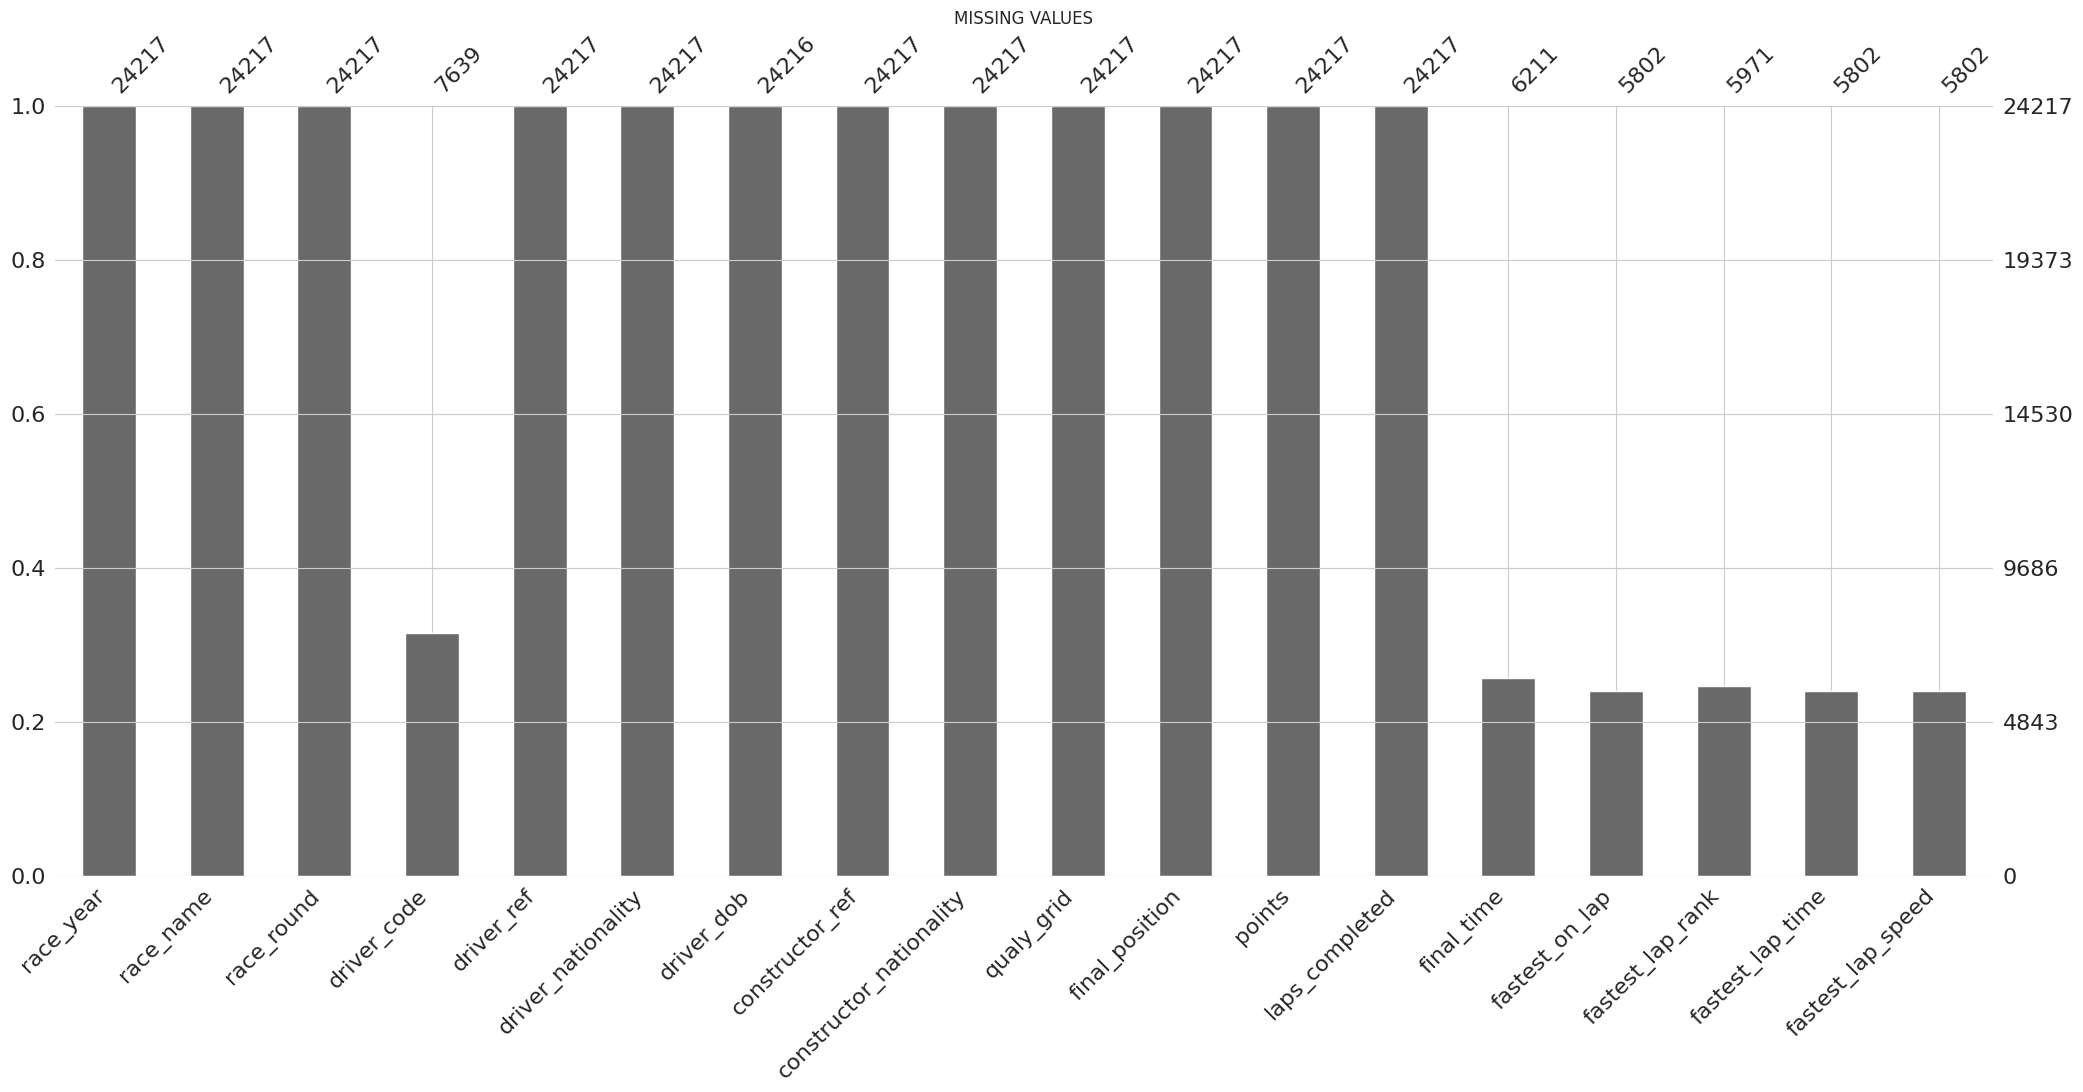

In [211]:
null_bar_graph = msno.bar(df)
null_bar_graph.set_title('MISSING VALUES')

We can see there's a lot of null values in lap times. We'll handle that after

In [212]:
print('QUANTITATIVE FEATURES INFO')
df.describe()

QUANTITATIVE FEATURES INFO


,race_year,race_round,qualy_grid,final_position,points,laps_completed
count,24217.000000,24217.000000,24217.000000,24217.000000,24217.000000,24217.000000
mean,1988.226865,8.213032,11.255482,13.034686,1.664102,45.409547
std,18.264381,4.830442,7.321633,7.799787,3.786581,30.364668
min,1950.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1975.000000,4.000000,5.000000,7.000000,0.000000,20.000000
50%,1989.000000,8.000000,11.000000,13.000000,0.000000,52.000000
75%,2004.000000,12.000000,17.000000,19.000000,1.000000,66.000000
max,2019.000000,21.000000,34.000000,39.000000,50.000000,200.000000


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24217 entries, 0 to 24216
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   race_year                24217 non-null  int64  
 1   race_name                24217 non-null  object 
 2   race_round               24217 non-null  int64  
 3   driver_code              7639 non-null   object 
 4   driver_ref               24217 non-null  object 
 5   driver_nationality       24217 non-null  object 
 6   driver_dob               24216 non-null  object 
 7   constructor_ref          24217 non-null  object 
 8   constructor_nationality  24217 non-null  object 
 9   qualy_grid               24217 non-null  int64  
 10  final_position           24217 non-null  int64  
 11  points                   24217 non-null  float64
 12  laps_completed           24217 non-null  int64  
 13  final_time               6211 non-null   object 
 14  fastest_on_lap        

####  <a name="2.2">2.2 Features engineering</a>
[Back to index](#indice)

The feature 'driver_code' has too many null values and it's not important for this analysis

In [214]:
df = df.drop(columns=['driver_code'])

Checking the number of rounds in each year:

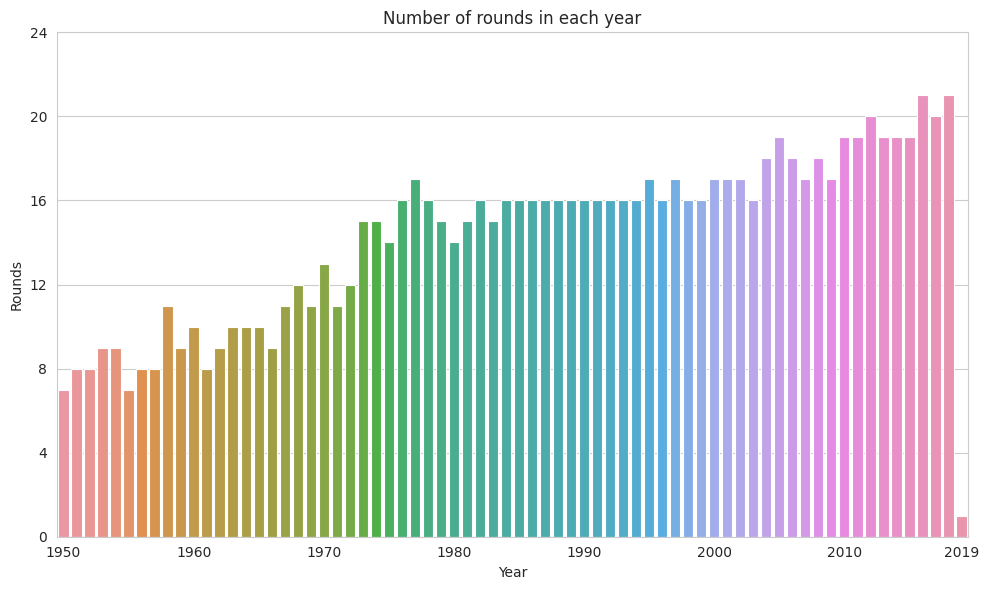

In [215]:
t = df.groupby('race_year')['race_round'].max()

fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(y = t, x = t.index,
           linewidth=.8, ax=ax)
plt.title('Number of rounds in each year')
plt.ylabel('Rounds')
plt.xlabel('Year')

ax.set_xticks([0,10,20,30,40,50,60,69])

ax.set_yticks([0,4,8,12,16,20,24])
# ax.set_xlim([n for n in range(1950,2020) if n % 10 == 0 or n == 2019])

plt.tight_layout()

We can see that in the 2019 season we only have 1 round registred. For that reason we are going to discard that year from our dataset.

In [216]:
df = df[df['race_year'] != 2019]
print('Dataset Shape')
df.shape

Dataset Shape


(24197, 17)

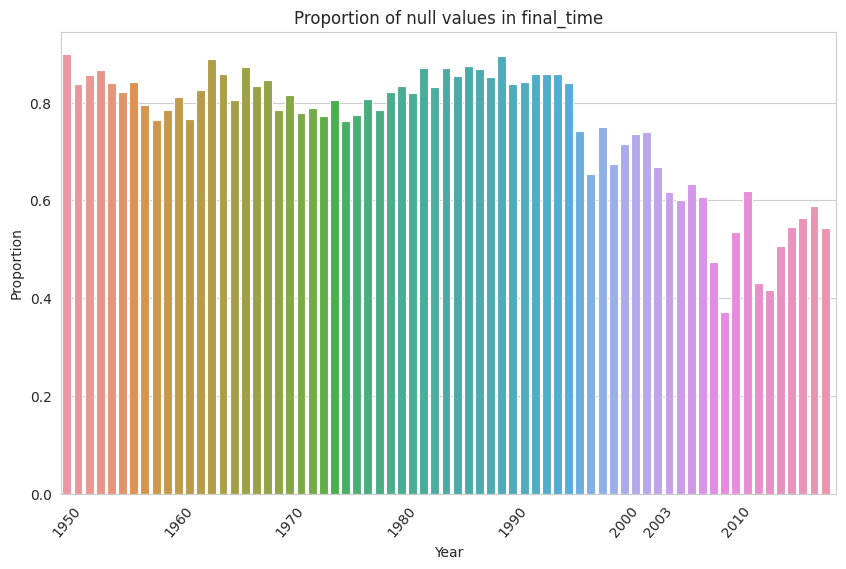

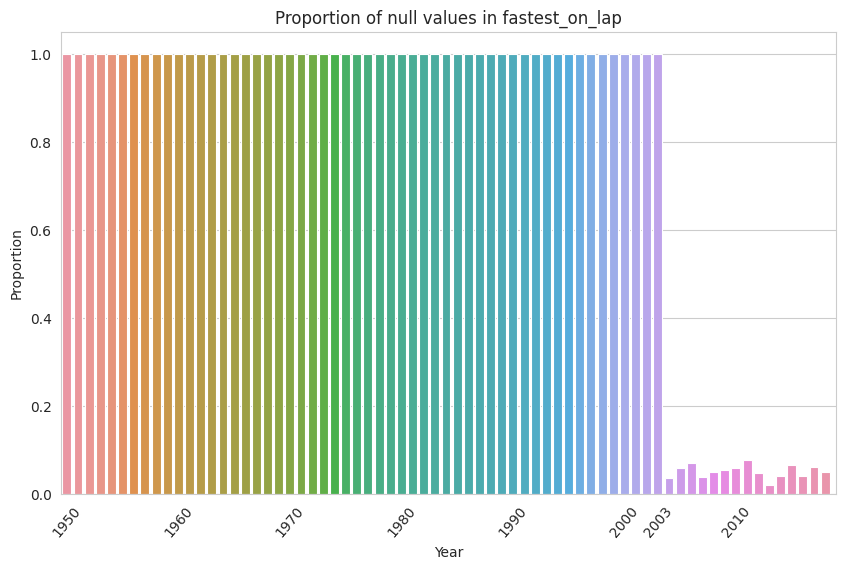

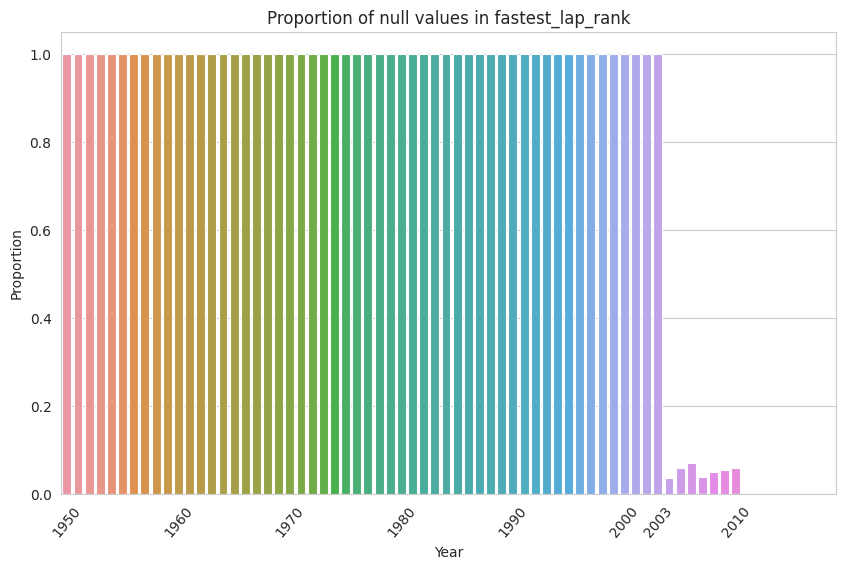

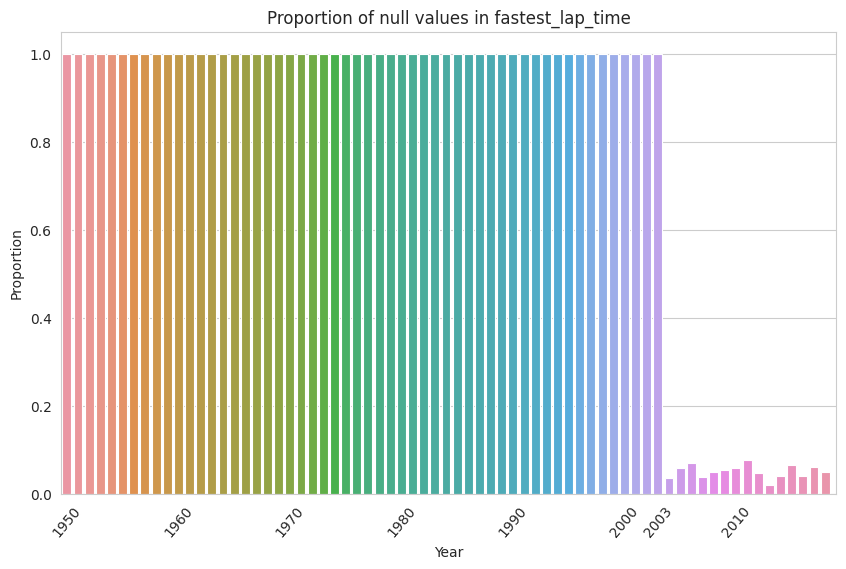

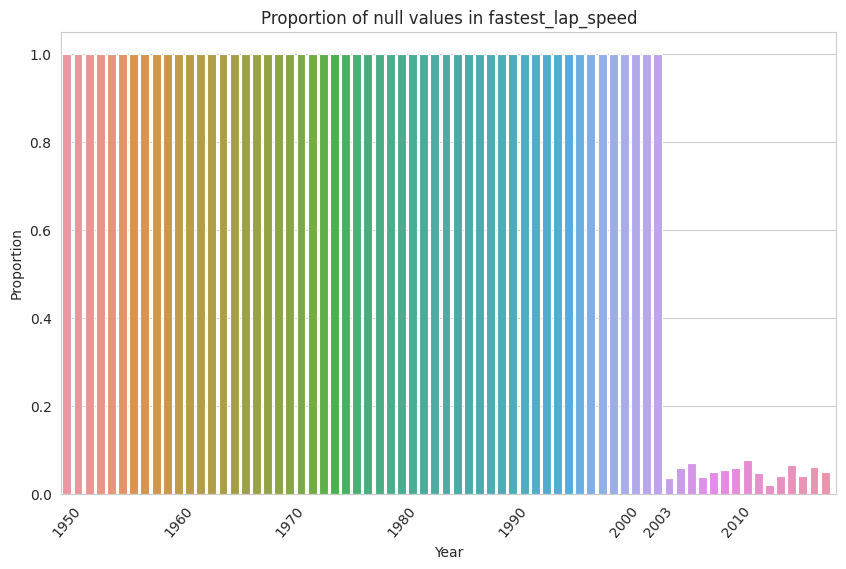

In [217]:
features_null_values = ['final_time', 'fastest_on_lap', 'fastest_lap_rank',
       'fastest_lap_time', 'fastest_lap_speed']

for feature in features_null_values:
  all_values_per_year = df.groupby('race_year')['race_name'].count()
  null_values_per_year = df.groupby('race_year')[feature].apply(lambda x: x.isnull().sum())

  proportion = [x / y for x, y in zip(null_values_per_year, all_values_per_year)]

  fig, ax = plt.subplots(figsize=(10, 6))
  sns.barplot(y = proportion, x = df.race_year.unique(),
           linewidth=.8, ax=ax)
  

  ax.set_xticks([0,10,20,30,40,50,53,60,69])

  
  plt.xticks(rotation=50)
  plt.title(f'Proportion of null values in {feature}')
  plt.ylabel('Proportion')
  plt.xlabel('Year')



We can check in graphical above that:
* 'final_time' has a lot of null_values not following a pattern
* 'fastest_lap_rank', 'fastest_lap_speed', 'fastest_lap_time' are only avaiable before year 2003.


Having said that, we conclude that it would be better to exclude the 'final_time' feature.


In [218]:
df = df.drop(columns=['final_time'])

Below we made some data type convertions:

In [219]:
df = df.astype({'fastest_on_lap': 'float64',
 'fastest_lap_rank': 'float64',
 'fastest_lap_speed': 'float64'})

df['fastest_lap_time'] = pd.to_timedelta('00:' + df['fastest_lap_time'])

df['driver_dob'] = pd.to_datetime(df['driver_dob'])

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24197 entries, 0 to 24196
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype          
---  ------                   --------------  -----          
 0   race_year                24197 non-null  int64          
 1   race_name                24197 non-null  object         
 2   race_round               24197 non-null  int64          
 3   driver_ref               24197 non-null  object         
 4   driver_nationality       24197 non-null  object         
 5   driver_dob               24196 non-null  datetime64[ns] 
 6   constructor_ref          24197 non-null  object         
 7   constructor_nationality  24197 non-null  object         
 8   qualy_grid               24197 non-null  int64          
 9   final_position           24197 non-null  int64          
 10  points                   24197 non-null  float64        
 11  laps_completed           24197 non-null  int64          
 12  fastest_on_lap    

####  <a name="2.3">2.3 Features description</a>
[Back to index](#indice)

##### **Dataset structure**

The dataset includes data from 1950 to 2019 of grand prix results, drivers, constructors, circuits and lap times. There are 19 features:

* **race_year:** year/season that Grand Prix happened
* **race_name:**  name of the Grand Prix
* **race_round:** sequential number of that race in that season
* **driver_ref:** driver's name
* **driver_nationality:** country where that drivers born 
* **driver_dob:** driver's date of birth
* **constructor_ref:** name of the car constructor
* **constructor_nationality:** country where the constructor is based
* **qualy_grid:** starting position earned in qualification
* **final_position:** final position at the end of the Grand Prix
* **points:** points earned in the Grand Prix
* **laps_completed:** total laps completed in the Grand Prix
* **fastest_on_lap:** lap where the fastest lap was got
* **fastest_lap_rank:** order of the fastest lap in a race
* **fastest_lap_time:** fastest lap time
* **fastest_lap_speed:** average speed of the fastest lap

#  <a name="3">3. Exploratory Analyses</a>
[Back to index](#indice)

> ####  <a name="3.1">3.1 UniVar</a>
[Back to index](#indice)

* Who are the most sucessfull drivers in Formula 1 history?

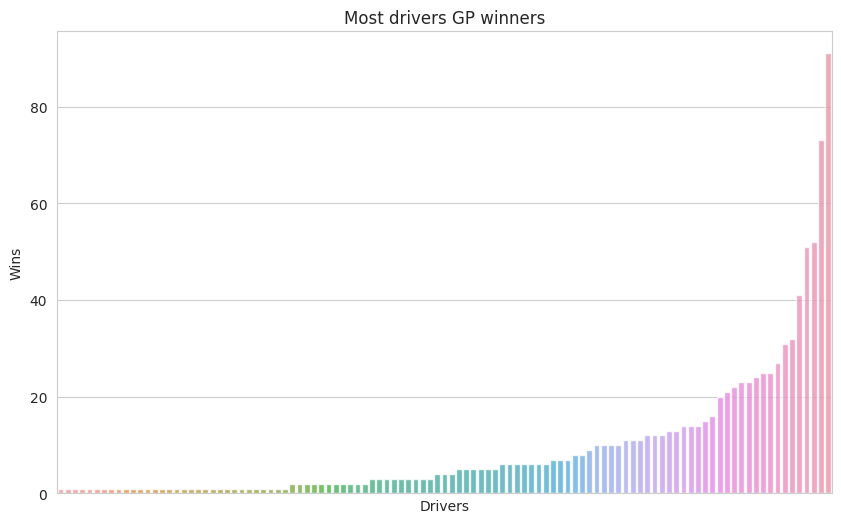

In [221]:
df_drivers_winners = df[df['final_position'] == 1].groupby('driver_ref')['final_position'].count().sort_values()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = df_drivers_winners.index, y=df_drivers_winners, alpha=0.8, ax=ax)

plt.title('Most drivers GP winners')
plt.xlabel('Drivers')
plt.ylabel('Wins')
plt.xticks([])

plt.show()

In the graph above, we can see a lot of drivers who have won at least 1 GP. For more detailed information, we considered drivers who have at least 20 victories.

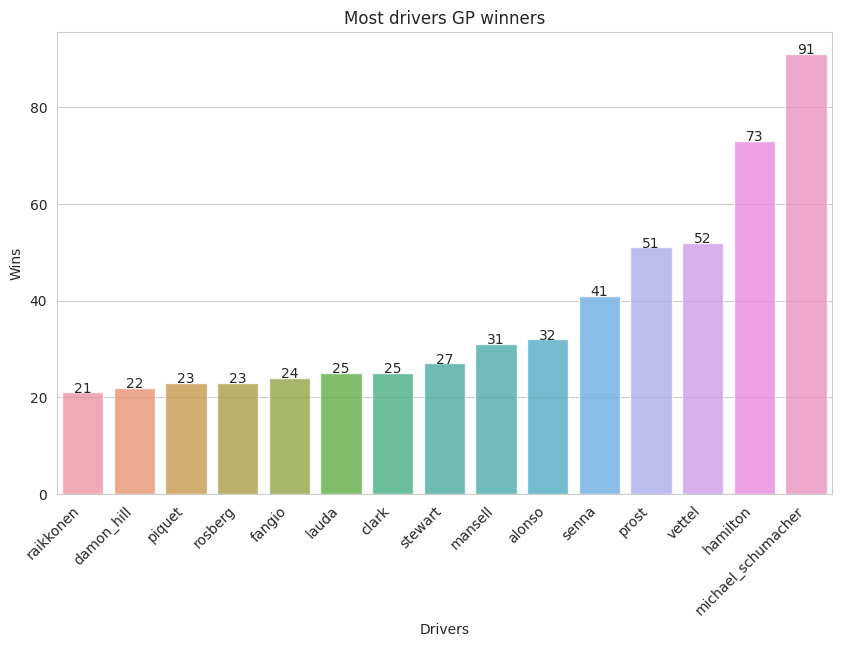

In [222]:
df_20_wins = df_drivers_winners[df_drivers_winners > 20]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = df_20_wins.index, y=df_20_wins, alpha=0.8, ax=ax)

plt.title('Most drivers GP winners')
plt.xlabel('Drivers')
plt.ylabel('Wins')

addlabels(x=df_20_wins.index, y=df_20_wins, ha='center')
plt.xticks(rotation=45, ha='right')
plt.show()

* We can see that Schumacher, Hamilton and Vettel, until 2018, was the top 3 drivers who gained more GP's.

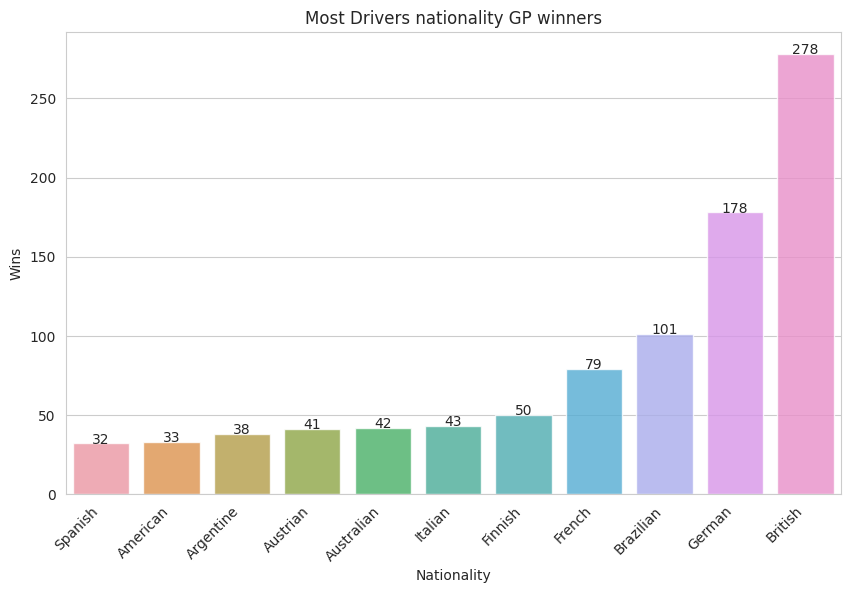

In [223]:
df_driver_nat_winners = df[df['final_position'] == 1].groupby('driver_nationality')['final_position'].count().sort_values()
df_driver_nat_winners = df_driver_nat_winners[df_driver_nat_winners > 20]


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = df_driver_nat_winners.index, y=df_driver_nat_winners, alpha=0.8, ax=ax)

plt.title('Most Drivers nationality GP winners')
plt.xlabel('Nationality')
plt.ylabel('Wins')

addlabels(x=df_driver_nat_winners.index, y=df_driver_nat_winners)
plt.xticks(rotation=45, ha='right')
plt.show()

We can see a predominance of British pilots. This makes sense since Formula 1 originated in Britain, and for a long time, the races only took place in the country.

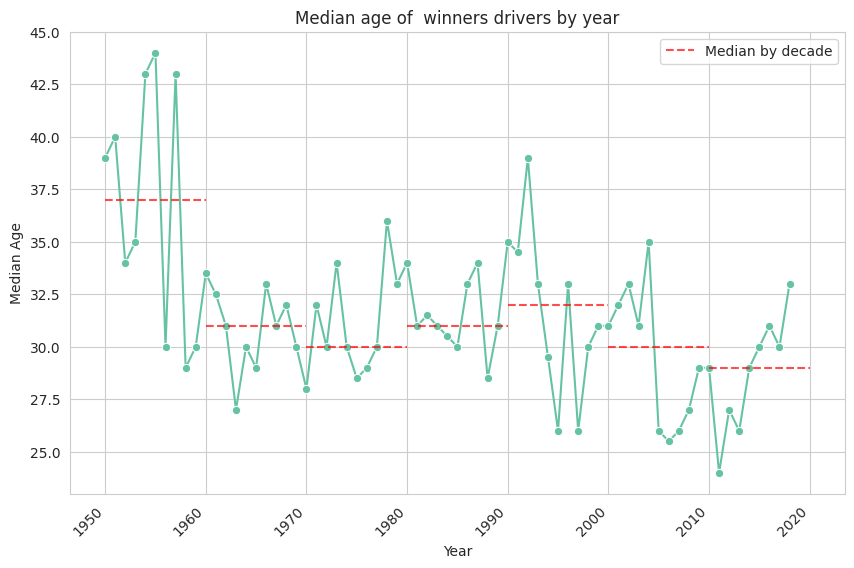

In [224]:
df['driver_age'] = df['race_year'] - pd.DatetimeIndex(df['driver_dob']).year
df_drivers_dob_median = df[df['final_position'] == 1].groupby('race_year')['driver_age'].median()
df_drivers_dob_median.index = pd.to_datetime(df_drivers_dob_median.index, format='%Y')

#calculating medians of medians
median_of_medians = {'range_year': [],
           'median': []}
for i, v in df_drivers_dob_median.items():
  if i.year % 10 == 0:
    dt_plus_10y = i + pd.DateOffset(years=10)
    df_x = df_drivers_dob_median[(df_drivers_dob_median.index >= i) & (df_drivers_dob_median.index < dt_plus_10y)]
    md = df_x.median()

    median_of_medians['range_year'].append(i)
    median_of_medians['median'].append(md)

df_md_of_md = pd.DataFrame(data=median_of_medians, index=median_of_medians['range_year'])
df_md_of_md = df_md_of_md.drop(columns=['range_year'])    


fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=df_drivers_dob_median.index.year.astype(int), y=df_drivers_dob_median, marker='o', ax=ax)
for ind, v in df_md_of_md['median'].items():
    if ind.year == 1950:
      dt_plus_10y = ind + pd.DateOffset(years=10)
      ax.plot([ind.year, dt_plus_10y.year], [v, v], color='red', linestyle='--', alpha = 0.7, label='Median by decade')
    else:
      dt_plus_10y = ind + pd.DateOffset(years=10)
      ax.plot([ind.year, dt_plus_10y.year], [v, v], color='red', linestyle='--', alpha = 0.7)

ax.legend()
plt.title('Median age of  winners drivers by year')
plt.xlabel('Year')
plt.ylabel('Median Age')


plt.xticks(rotation=45, ha='right')
plt.show()

Here we can see the median age of drivers in each F1 season. The median by decade was plotted in red. We can affirm that in the first decade (1950 ~ 1960), the drivers were older than in any other decade. The last decade had the youngest drivers seen.

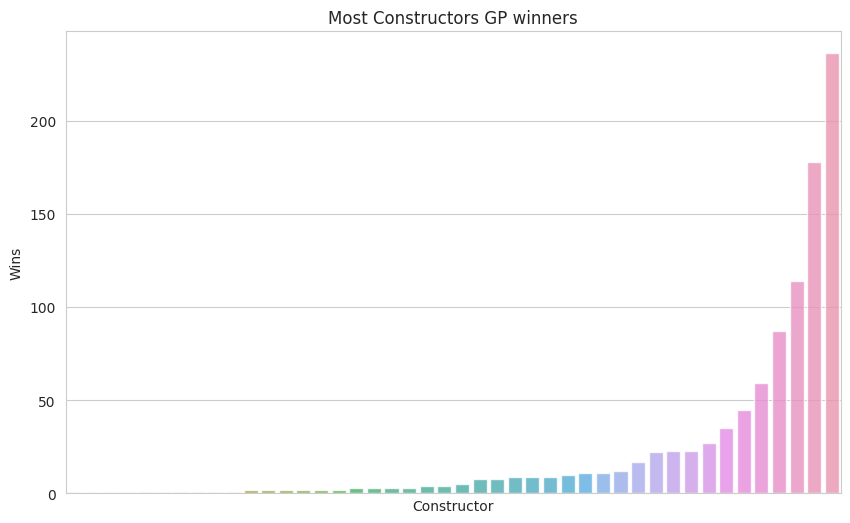

In [225]:
df_constr_wins = df[df['final_position'] == 1].groupby('constructor_ref')['final_position'].count().sort_values()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = df_constr_wins.index, y=df_constr_wins, alpha=0.8, ax=ax)

plt.title('Most Constructors GP winners')
plt.xlabel('Constructor')
plt.ylabel('Wins')
plt.xticks([])

plt.show()

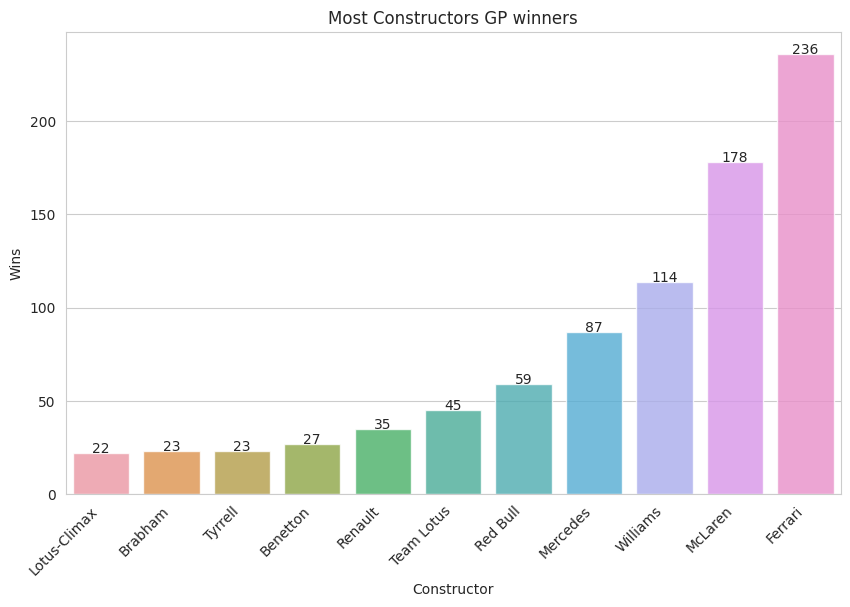

In [226]:
df_constr_top_winners = df_constr_wins[df_constr_wins>20]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = df_constr_top_winners.index, y=df_constr_top_winners, alpha=0.8, ax=ax)

plt.title('Most Constructors GP winners')
plt.xlabel('Constructor')
plt.ylabel('Wins')
plt.xticks(rotation=45, ha='right')
addlabels(x = df_constr_top_winners.index, y=df_constr_top_winners)
plt.show()

Ferrari is the only constructor team that has participated in all F1 seasons. And, as we can see, it is the most successful team in history, alongside McLaren and Williams.

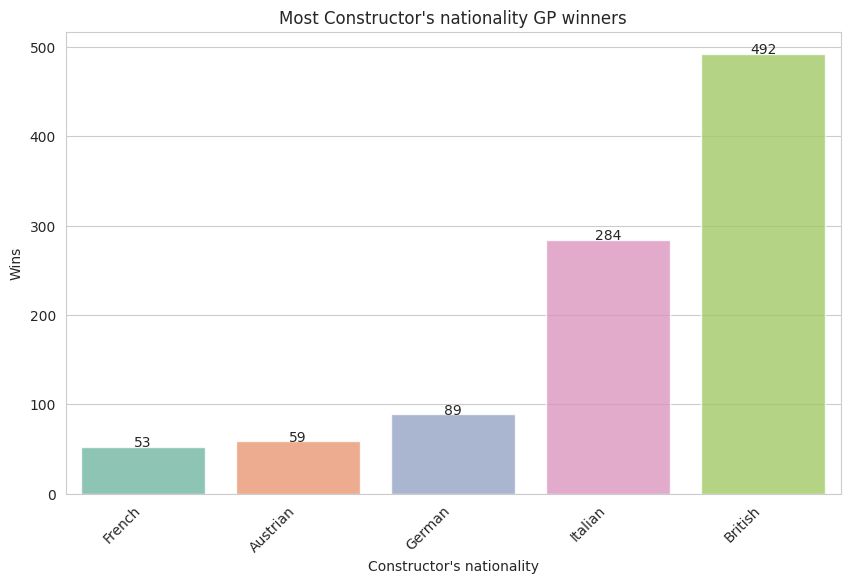

In [227]:
df_constr_top_nat = df[df['final_position'] == 1].groupby('constructor_nationality')['final_position'].count().sort_values()
df_constr_top_nat = df_constr_top_nat[df_constr_top_nat > 20]


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = df_constr_top_nat.index, y=df_constr_top_nat, alpha=0.8, ax=ax)

plt.title("Most Constructor's nationality GP winners")
plt.xlabel("Constructor's nationality")
plt.ylabel('Wins')

addlabels(x=df_constr_top_nat.index, y=df_constr_top_nat)
plt.xticks(rotation=45, ha='right')
plt.show()

As we can see, British constructor teams have the most victories in history. The same argument, presented when analyzing the nationality of winning drivers, is valid in this case. Formula 1 has British origins, and for a long time, the majority of constructors were of the same origin.

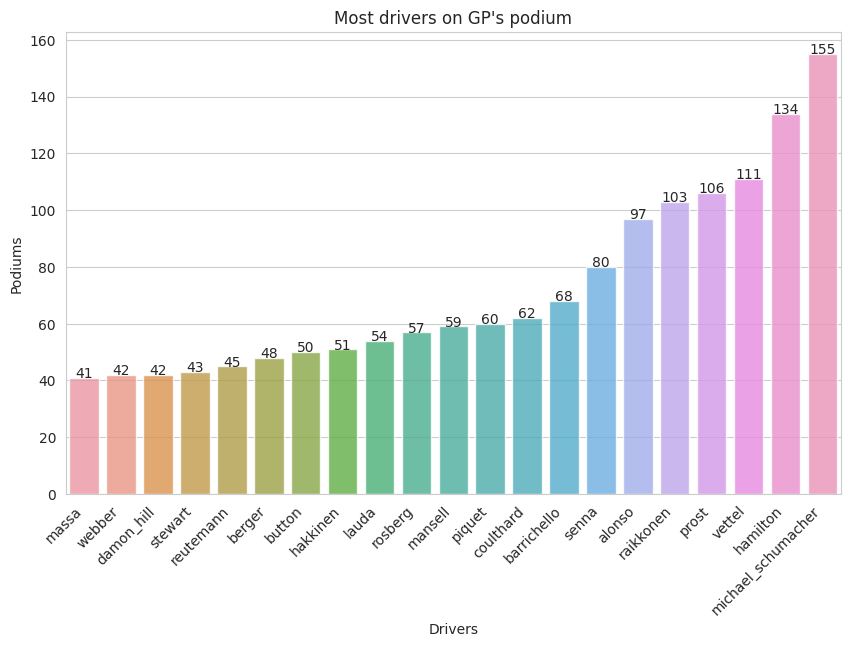

In [228]:
df_drivers_podium = df[df['final_position'] <= 3].groupby('driver_ref')['final_position'].count().sort_values()
df_drivers_podium = df_drivers_podium[df_drivers_podium > 40]

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = df_drivers_podium.index, y=df_drivers_podium, alpha=0.8, ax=ax)


plt.title("Most drivers on GP's podium")
plt.xlabel("Drivers")
plt.ylabel('Podiums')


addlabels(x=df_drivers_podium.index, y=df_drivers_podium)
plt.xticks(rotation=45, ha='right')
plt.show()

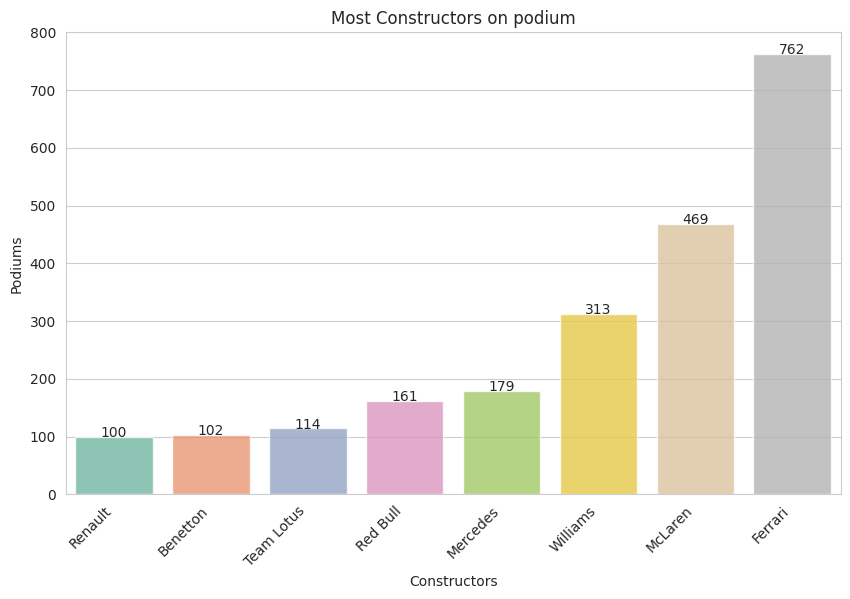

In [229]:
df_construc_podiums = df[df['final_position'] <= 3].groupby('constructor_ref')['final_position'].count().sort_values()
df_construc_podiums = df_construc_podiums[df_construc_podiums >= 100]


fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = df_construc_podiums.index, y=df_construc_podiums, alpha=0.8, ax=ax)

plt.title("Most Constructors on podium")
plt.xlabel("Constructors")
plt.ylabel('Podiums')

addlabels(x=df_construc_podiums.index, y=df_construc_podiums)
plt.xticks(rotation=45, ha='right')
plt.show()

Just like in the wins ranking, Schumi, Hamilton, and Vettel lead the drivers with the most podium finishes in the category and Ferrari, McLaren and Willian in constructors.

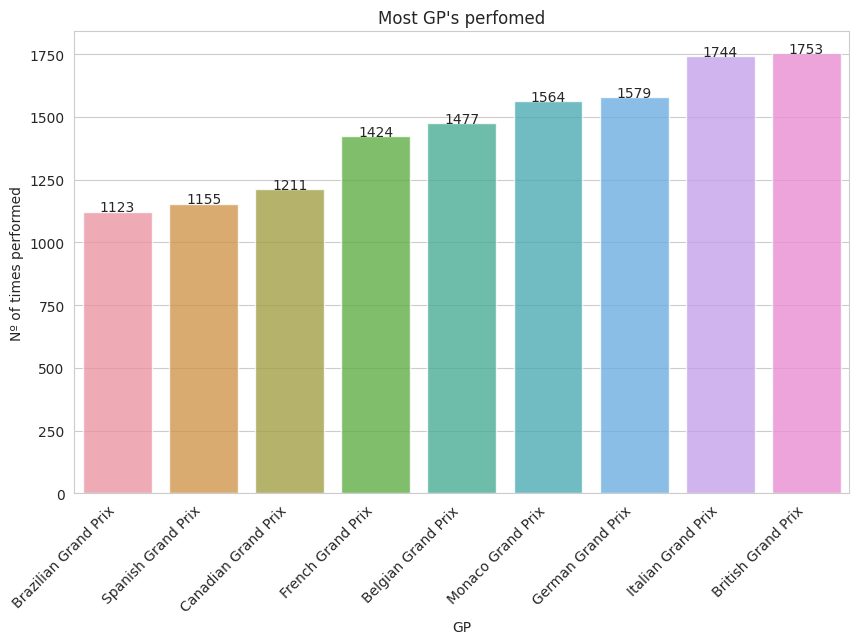

In [230]:
df_top_gps=df.groupby('race_name')['final_position'].count().sort_values()
df_top_gps = df_top_gps[df_top_gps >= 1000]



fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = df_top_gps.index, y=df_top_gps, alpha=0.8, ax=ax)

plt.title('Most GP\'s perfomed')
plt.xlabel('GP')
plt.ylabel('Nº of times performed')
plt.xticks(rotation=45, ha='right')
addlabels(x = df_top_gps.index, y=df_top_gps)
plt.show()

The British and Italians Grand Prix's were the most performed GP's, followed by German and Monaco GP's. 

> ####  <a name="3.2">3.2 BiVar</a>
[Back to index](#indice)

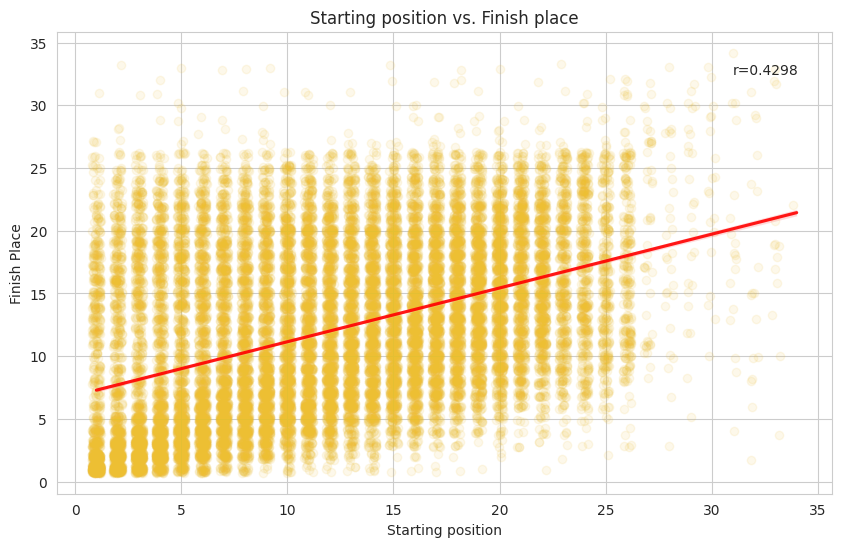

In [231]:
#0 means that the driver started from pit lane.
df_no_zero = df[df['qualy_grid'] != 0]

import scipy as sp

fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(data = df_no_zero, x = 'qualy_grid', y = 'final_position', x_jitter = 0.2, y_jitter = 0.3, scatter_kws = {'alpha' : 0.1, 'color': '#edbf33'}, line_kws = {'alpha': 0.9, 'color': 'r'}, ax=ax)
r, p = sp.stats.pearsonr(df_no_zero['qualy_grid'], df_no_zero['final_position'])
ax.text(31,32.5, f'r={round(r, 4)}')
plt.title('Starting position vs. Finish place')
plt.ylabel('Finish Place')
plt.xlabel('Starting position')
plt.show()

We can affirm a linear relantionship between the Starting Position and Finish Position. In other words, we can say that is easy to get the victories on race day if you start in front. What seems logical to me.

20


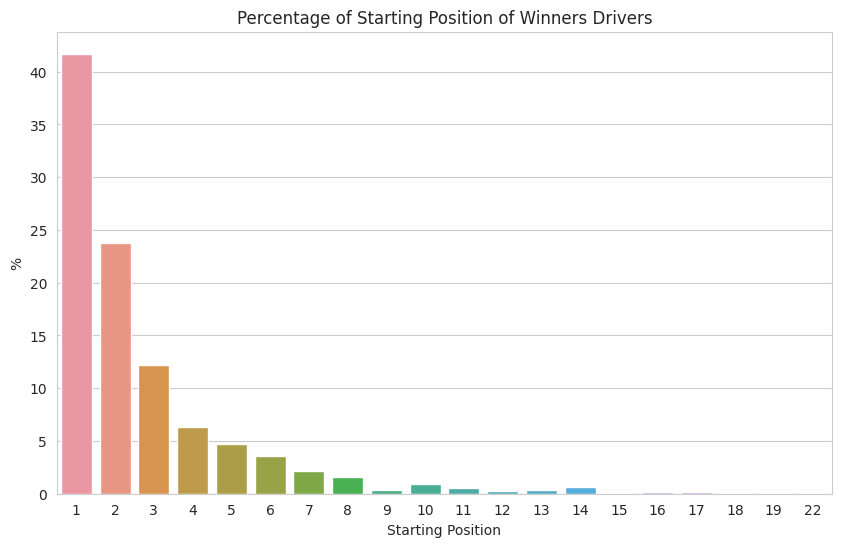

In [232]:
df_winners = df[df['final_position'] == 1]

count = df_winners.groupby('qualy_grid')['final_position'].count()
prop = pd.Series([(v/total)*100 for i, v in count.items()]) 

print(len(prop.index))

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(y= prop, x=count.index, ax=ax)
plt.title('Percentage of Starting Position of Winners Drivers')
plt.ylabel('%')
plt.xlabel('Starting Position')
plt.show()



Here we can see all the percentages of victories by each starting positions. 

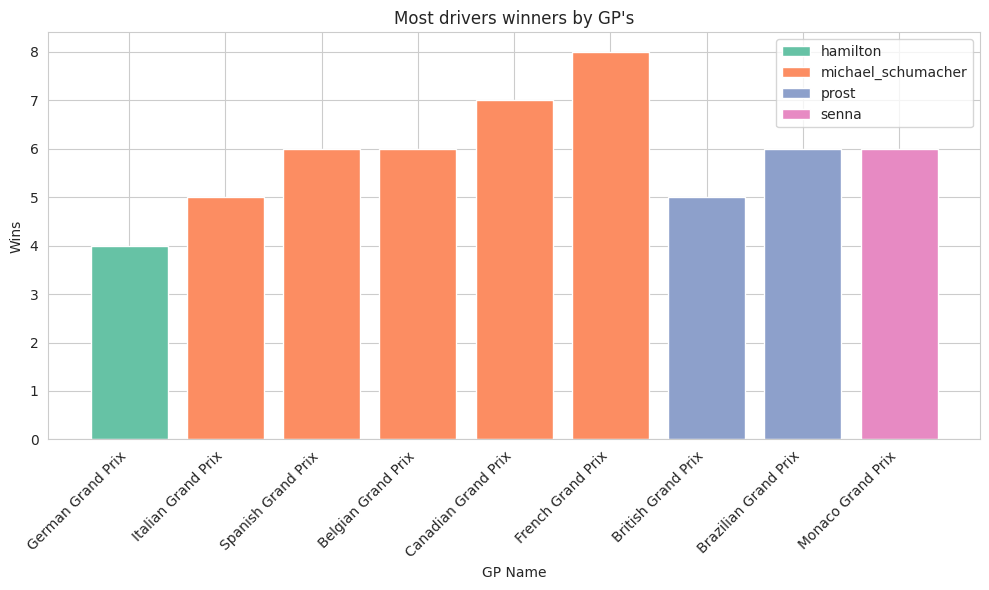

In [233]:
#drivers x constructs

data = {}
for i, r in df_top_gps.items():
  t = df[df['race_name'] == i]
  t1 = t[t['final_position'] == 1].groupby('driver_ref')['final_position'].count().sort_values()
  data[i] = (t1.index[-1], t1[-1])

data_df = pd.DataFrame.from_dict(data, orient='index', columns=['driver', 'wins'])
data_df.reset_index(inplace=True)
data_df.columns = ['gp_name', 'most_winner', 'wins']

plt.figure(figsize=(10, 6))

data_df = data_df.sort_values('wins')
groups = data_df.groupby('most_winner')

for name, group in groups:    
    plt.bar(group['gp_name'], group['wins'], label=name)

plt.xticks(rotation=45, ha='right')
plt.xlabel('GP Name')
plt.ylabel('Wins')
plt.title('Most drivers winners by GP\'s')


plt.legend()
plt.tight_layout()  

plt.show()



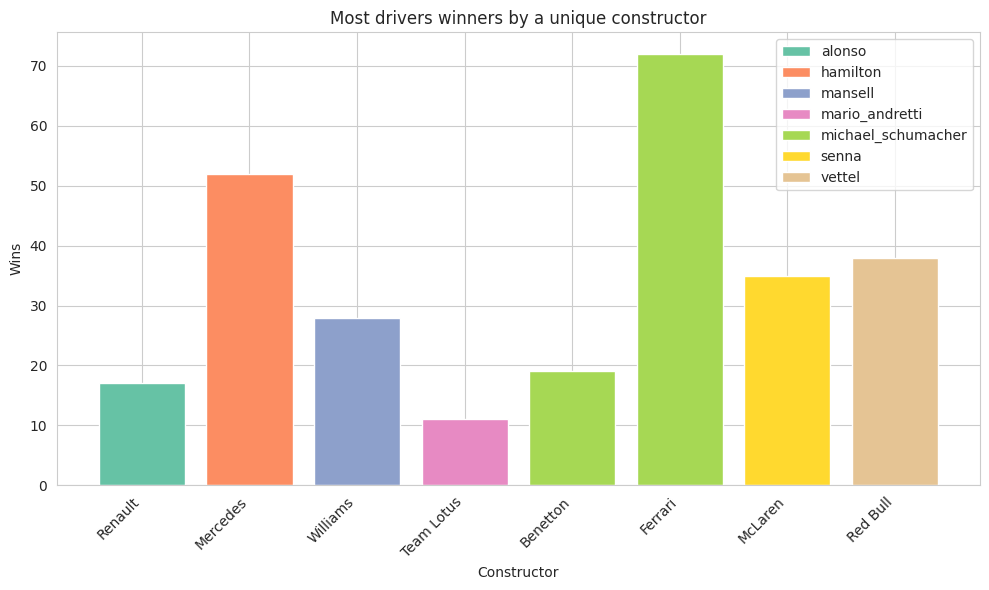

In [234]:
data = {}
for i, r in df_construc_podiums.items():
  t = df[df['constructor_ref'] == i]
  t1 = t[t['final_position'] == 1].groupby('driver_ref')['final_position'].count().sort_values()
  data[i] = (t1.index[-1], t1[-1])

data_df = pd.DataFrame.from_dict(data, orient='index', columns=['driver', 'wins'])
data_df.reset_index(inplace=True)
data_df.columns = ['constructor', 'most_winner', 'wins']

data_df = data_df.sort_values('wins')

plt.figure(figsize=(10, 6))
groups = data_df.groupby('most_winner')


for name, group in groups:    
    plt.bar(group['constructor'], group['wins'], label=name)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Constructor')
plt.ylabel('Wins')
plt.title('Most drivers winners by a unique constructor')

plt.legend()
plt.tight_layout()  

plt.show()



* How speed changed over the years


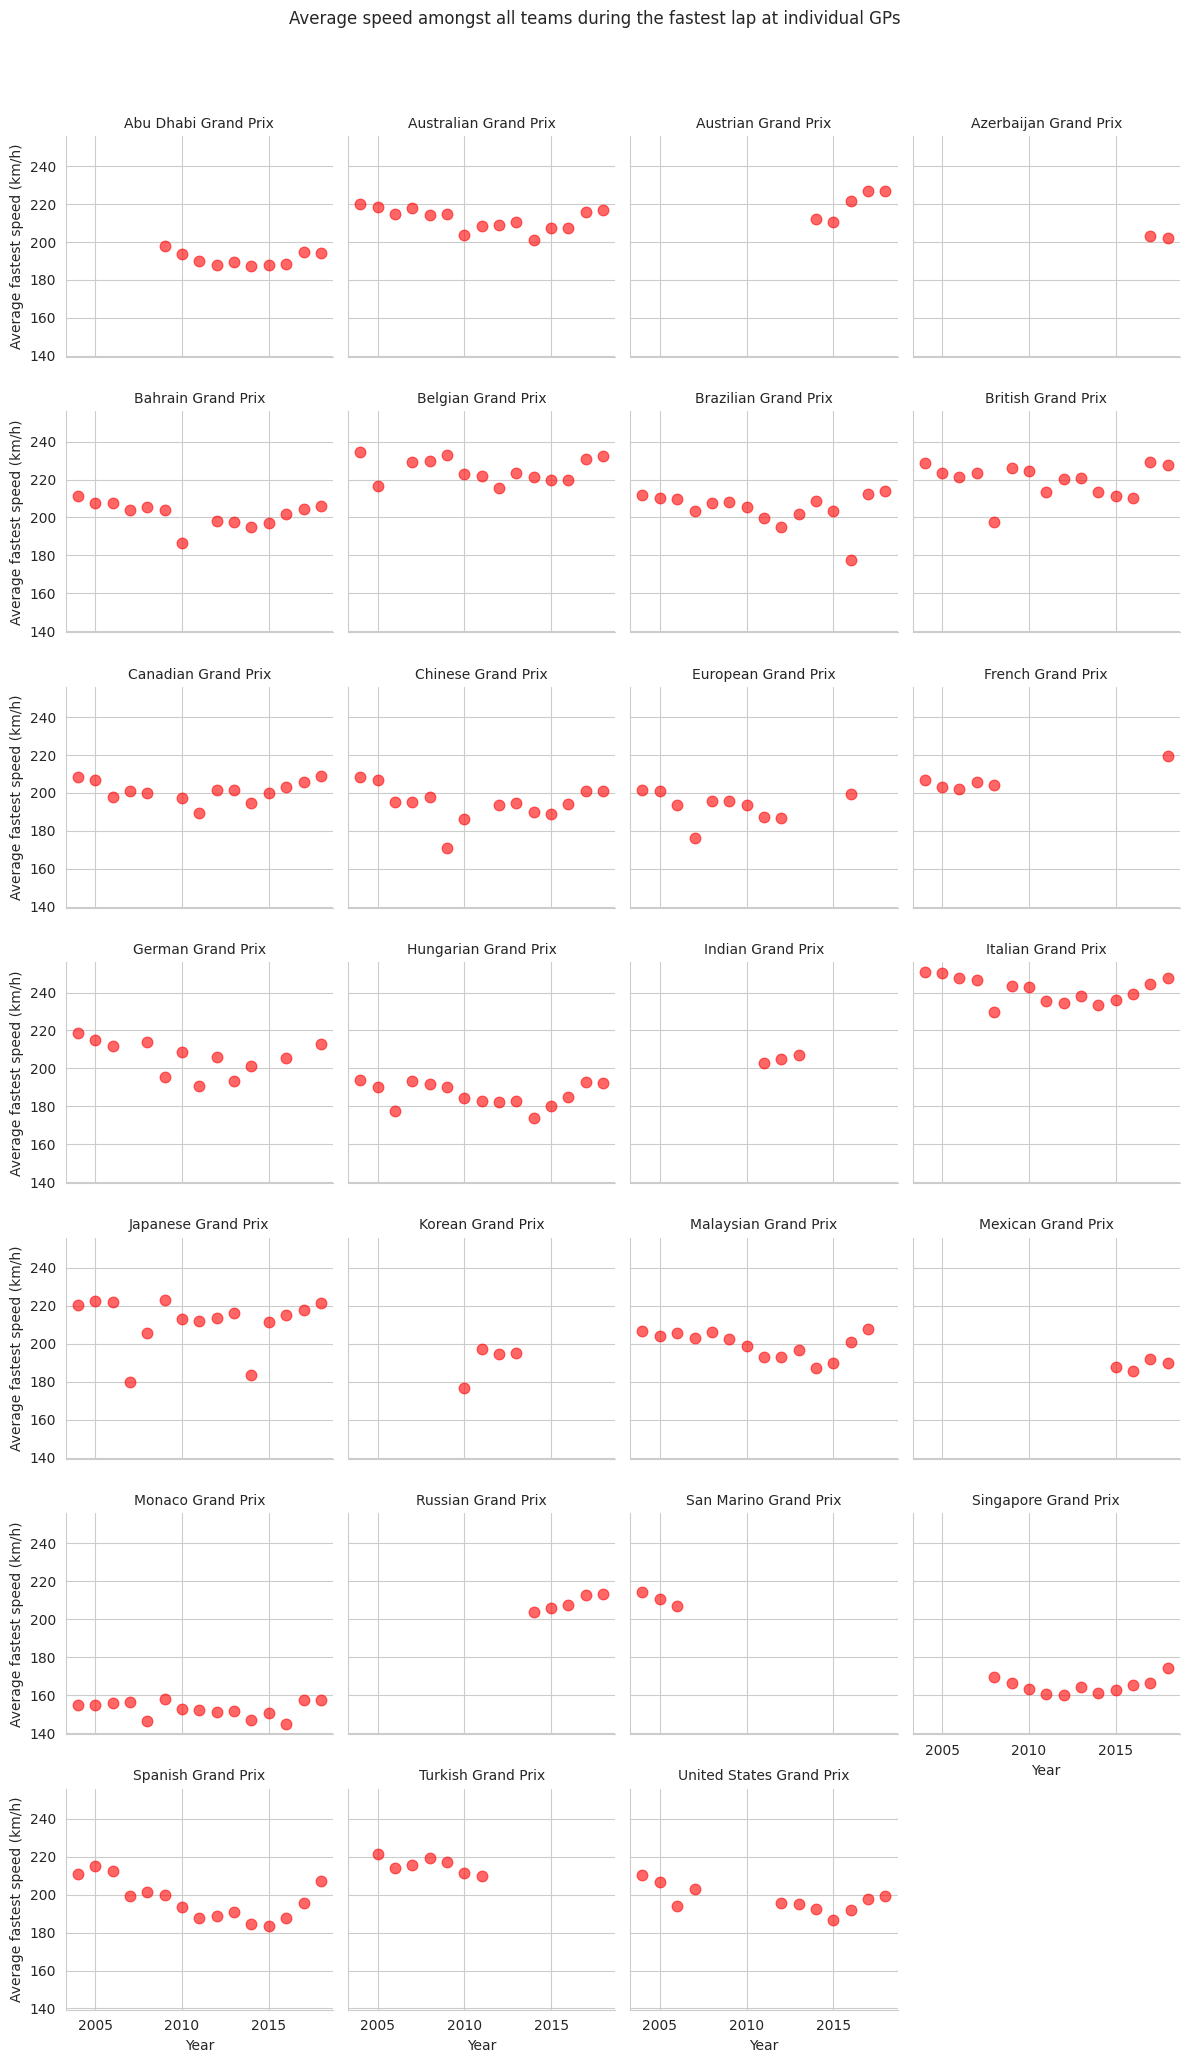

In [235]:
df_times = df[df['race_year'] >= 2004]
df_group_speed = df_times.groupby(['race_name', 'race_year'])['fastest_lap_speed'].mean().to_frame().reset_index()

g = sns.FacetGrid(data = df_group_speed, col = 'race_name', col_wrap=4)
g.map(plt.scatter, 'race_year','fastest_lap_speed', alpha = 0.6, linewidth=.8, s = 60, color='r' )
g.set_titles("{col_name}")
g.set_xlabels('Year')
g.set_ylabels('Average fastest speed (km/h)')
plt.subplots_adjust(top=0.92)
g.fig.suptitle('Average speed amongst all teams during the fastest lap at individual GPs');
  

We can see two trends in the graphs above. Before 2015, we can see a decline in average speed, and after 2015, we can see an increase.
This can be explained by new regulations in the sport after 2015. The cars and power units underwent significant changes, resulting in faster cars in general.

* Fastest and lowest GP's

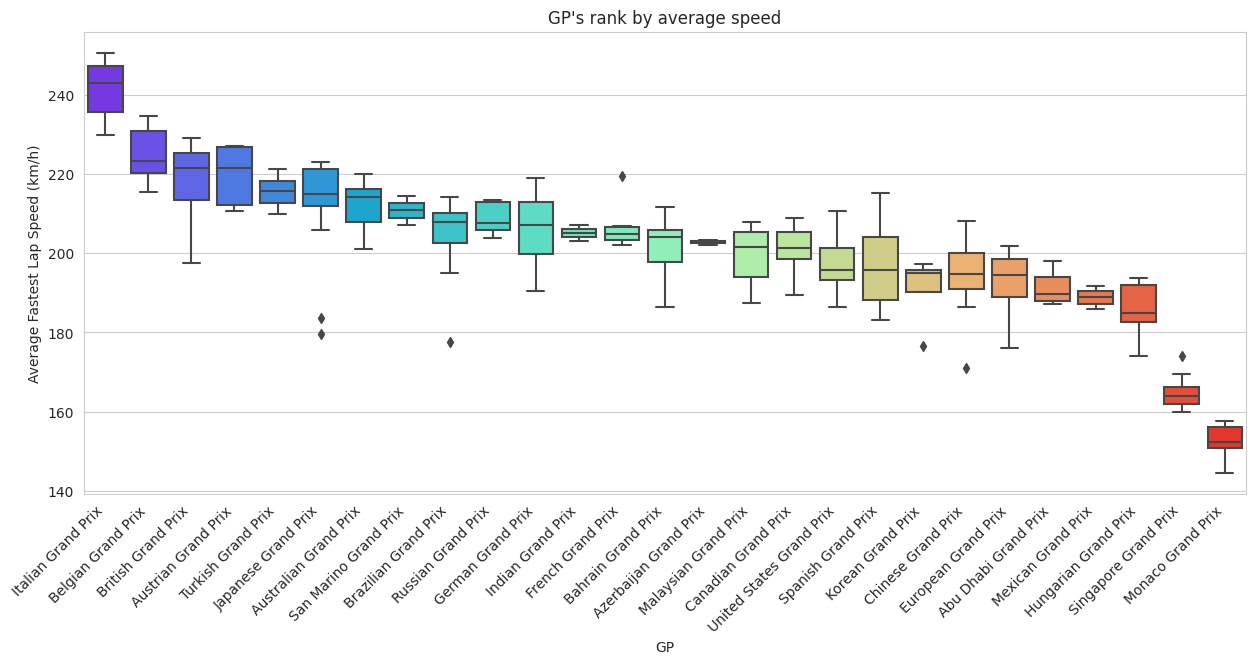

In [236]:
df_group_speed.head()
plt.figure(figsize=(15, 6))

order = df_group_speed.groupby(by=["race_name"])["fastest_lap_speed"].median().sort_values(ascending=False).index

sns.boxplot(y='fastest_lap_speed', x='race_name', data=df_group_speed, palette='rainbow', order=order)
plt.xticks(rotation = 45, ha='right')
plt.title('GP\'s rank by average speed')
plt.xlabel('GP')
plt.ylabel('Average Fastest Lap Speed (km/h)')
plt.show()

The Italian GP is the fastest and Monaco the lowest track in the history of F1.

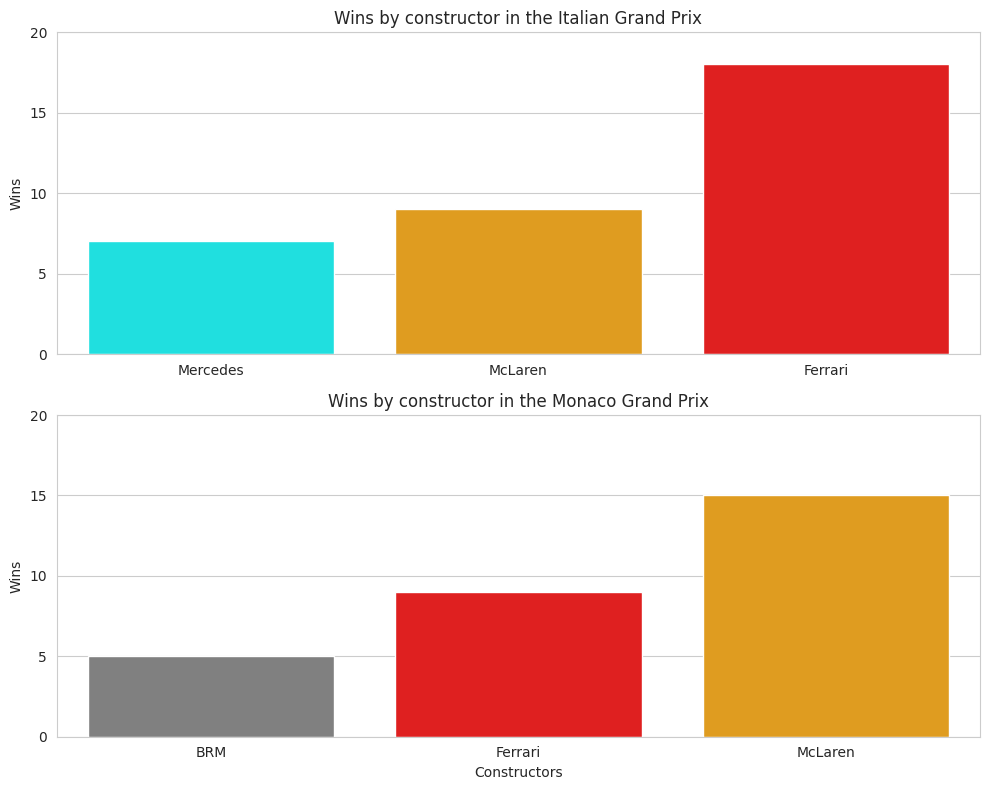

In [237]:
italian = df[(df['race_name'] == 'Italian Grand Prix') & (df['final_position'] == 1)]
monaco = df[(df['race_name'] == 'Monaco Grand Prix') & (df['final_position'] == 1)]


italian_wins = italian.groupby('constructor_ref')['final_position'].sum().sort_values()
italian_wins = italian_wins[italian_wins > 6]
monaco_wins = monaco.groupby('constructor_ref')['final_position'].sum().sort_values()
monaco_wins = monaco_wins[monaco_wins > 4]

fig, axs = plt.subplots(2, figsize=(10,8))


colors = ['red' if x == 'Ferrari' else 'cyan' if x == 'Mercedes' else 'orange' if x == 'McLaren' else 'gray' for x in italian_wins.index]
sns.barplot(x=italian_wins.index, y= italian_wins, ax=axs[0], palette=colors)
axs[0].set_title('Wins by constructor in the Italian Grand Prix')
axs[0].set_ylabel('Wins')
axs[0].set_xlabel('')
axs[0].set_yticks([20,15,10,5,0])

colors = ['red' if x == 'Ferrari' else 'blue' if x == 'Mercedes' else 'orange' if x == 'McLaren' else 'gray' for x in monaco_wins.index]
sns.barplot(x=monaco_wins.index, y= monaco_wins, ax=axs[1], palette=colors)
axs[1].set_title('Wins by constructor in the Monaco Grand Prix')
axs[1].set_ylabel('Wins')
axs[1].set_xlabel('Constructors')
axs[1].set_yticks([20,15,10,5,0])


plt.tight_layout()

plt.show()

#  <a name="4">4. Conclusion</a>
[Back to index](#indice)

 In this analysis, we were able to verify the most successful drivers and constructor teams in the history of Formula 1. Just like the category itself has changed in terms of car speeds and its Grand Prix. And, no less important, the study and improvement in dataframe manipulation techniques and graph plotting were a success.

#  <a name="5">5. References</a>
[Back to index](#indice)

* https://github.com/PiotrMajor/F1-Data-Visualization/blob/master/Formula%201%20Data%20Exploration.ipynb https://github.com/gandalf1819/Formula1

* https://github.com/gandalf1819/Formula1